# Project 1

Faris Sbahi

In this project, we will study a $d$ dimensional scalar field theory on the lattice.

Define the lattice action

$$
S^l_E = \sum_x \{ \frac{1}{2} \chi_x^2 - \frac{\kappa}{2} \sum_{\mu} \chi_x \chi_{x + \hat{\mu}} + g \chi_x^4 \}
$$

$$
\kappa^{-1} := 2d + \alpha \\
\alpha := (m_0a)^2
$$

where $m_0$ is the bare lattice mass term and $a$ is the lattice spacing.

First, fix $g=0$. We wish to compute 

$$
\sigma = \frac{1}{L^d}\sum_x \langle \chi^2_x \rangle
$$

By definition,

$$
\langle \phi(x) \phi(y)\rangle = \frac{1}{Z} \int [d \phi] e^{-S_E(\phi)} \phi(x) \phi(y)
$$

where 


$$
Z = \int [d\phi] e^{-S_E(\phi)}
$$

Hence,

$$
\langle \chi^2_x \rangle = \frac{1}{Z}\int [d \phi] e^{-S_E(\phi)} \chi^2_x
$$

and we can construct $S$ as a matrix-vector product in terms of $M$

$$
S_E^l = \frac{1}{2}\chi_{i}M_{ij}\chi_{j}\\
M_{ij} = - \kappa \sum_{\mu} (\delta_{i + \mu, j} + \delta_{i - \mu, j}) + \delta_{ij}
$$


> Note: it takes too long to build it up in $d=4$ so an alternative is recognize that $g=0$, $\kappa$ nonzero is an NN coupling and Fourier transform to momentum space. There the coupling will be eliminated so you should be able to do a couple of integrals.

In [3]:
import numpy as np

In [4]:
def m_ij(i, j, L, d, kappa, g):
    if i == j:
        return 1
    
    for axis in range(d):
        if ((i + L**axis) % (L ** d) == j) or ((i - L**axis) % (L ** d) == j):
            return -1 * kappa
        
    return 0

def M_inv(L, d, kappa):
    M = np.zeros((L ** d, L ** d))
    
    for i in range(L**d):
        for j in range(L ** d):
            M[i, j] = m_ij(i, j, L, d, kappa, g)
            
    return np.linalg.inv(M)

In [5]:
g = 0
L = 2 ** 4

alpha = 0.25

# 1. $L = 16, g = 0, \alpha = 0.25$

In [89]:
for d in range(2, 5):
    print("d: ", d)
    
    kappa = 1 / ( 2 * d + alpha)
    
    G = M_inv(L, d, kappa)
    
    sigma = np.trace(G) / (L ** d)
    
    chi = np.sum(G) / (L ** d)
    
    F = np.sum(
    [ G[i,j] * np.cos(2 * np.pi * (
        (i % L) - (j % L)
        ) / L
        ) for i in range(L**d) for j in range(L**d)]) / (L**d)
    
    M_L = 2 * (np.sin(np.pi / L)) / (np.sqrt((chi / F) - 1)) # desire chi/F = 1.61
    
    print("sigma: ", sigma, "chi: ", chi, "F: ", F, "M_L: ", M_L)
    
    
    

d:  2
sigma:  1.6020690583803063 chi:  16.999999999999996 F:  10.565806785026753 M_L:  0.4999999999999997
d:  3
sigma:  1.3197886806296557 chi:  25.0 F:  15.537951154451697 M_L:  0.5000000000000246
d:  4


KeyboardInterrupt: 

# $L = 16, g = 0.1, \alpha = 0.25, \kappa = 0$

g = 0.1
L = 2 ** 4

alpha = 0.25

for d in range(2, 5):
    print("d: ", d)
    
    kappa = 1 / ( 2 * d + alpha)
    
    G = M_inv(L, d, kappa, g)
    
    sigma = np.trace(G) / (L ** d)
    
    chi = np.sum(G) / (L ** d)
    
    F = np.sum(
    [ G[i,j] * np.cos(2 * np.pi * (
        (i % L) - (j % L)
        ) / L
        ) for i in range(L**d) for j in range(L**d)]) / (L**d)
    
    M_L = 2 * (np.sin(np.pi / L)) / (np.sqrt((chi / F) - 1)) # desire chi/F = 1.61
    
    print("sigma: ", sigma, "chi: ", chi, "F: ", F, "M_L: ", M_L)

$$
\langle \phi(x) \phi(y)\rangle =  \int [d \phi] P([\phi]) \phi(x) \phi(y)
$$

for 

$$
P([\phi]) = \frac{e^{-S_E^l(\phi)}}{Z}
$$

to simplify take configuration

$$
\zeta := [\phi]
$$

and

$$
W(\zeta) = e^{-S_E^l(\phi)} 
$$

so that

$$
P(\zeta) = \frac{W(\zeta)}{\sum_{\zeta} W(\zeta)}
$$

Now, write

$$
\chi_x \equiv \rho_x s_x
$$

with $s_x = sgn(\chi_x)$. And so

$$
S_E^l(x) = \sum_x \{ \frac{1}{2} \rho_x^2 - \frac{\kappa}{2} \sum_{\mu} \rho_x \rho_{x + \hat{\mu}}s_x s_{x + \hat{\mu}} + g \rho_x^4 \}
$$

For the spin update $\rho$ is fixed so that

$$
W(\zeta) = \exp(-\sum_{\mu} \rho_x \rho_{x + \hat{\mu}}s_x s_{x + \hat{\mu}})
$$

and so the spin update for $T$ has the following algorithm:

1. Keep two lists: sites_visited, sites_visited_flag

2. Initialize: pick site at random
    - add to sites_visited
    - mark as visited with flag
    
3. Go over all visited sites and look over all neighboring directions. Let the visted site have spin $s_1$ and its neighbor $s_2$:
    - if $s_1 \neq s_2$ do nothing
    - if $s_1 = s_2$ then with probability $1-\exp(-2 \kappa \rho_x \rho_y)$

4. Repeat for all site in sites_visited

5. When all sites of sites_visisted have been exhausted, then flip the signs of all on sites_visited_flag

Now, for the regular update let us define a constant (recalling that we update one site at a time)

$$
\alpha := \kappa \sum_{x, \hat{\mu}} (\chi_{x + \hat{\mu}} + \chi_{x - \hat{\mu}})
$$

and hence, up to a constant,

$$
W(\zeta) = \exp(-\frac{1}{2} (\chi_x - \alpha)^2 - g \chi_x^4)
$$



In [22]:
def get_neighbors(idx):
    n = [(idx + direction * (L ** dim)) % (L ** d) for direction in [-1, 1] for dim in range(d)]
    return n

def spin_update():
    sites_visited = []
    sites_visited_flag = set()

    init = np.random.randint(0, high = L ** d - 1)

    sites_visited.append(init)
    sites_visited_flag.add(init)

    while (len(sites_visited) != 0 and len(sites_visited_flag) != L ** d):
        idx = sites_visited.pop()
        for nbr_idx in get_neighbors(idx):
            #print("checking spin for time dim: ", idx % L, nbr_idx % L)
            #print("sites visited: ", sites_visited_flag, lattice_signs[nbr_idx], lattice_signs[idx])
            #print(nbr_idx not in sites_visited_flag and lattice_signs[nbr_idx] == lattice_signs[idx])
            if nbr_idx not in sites_visited_flag and lattice_signs[nbr_idx] == lattice_signs[idx]:
                #print(nbr_idx)
                
                prob = 1 - np.exp(- 2 * kappa * lattice_rad[idx] * lattice_rad[nbr_idx])
                s = np.random.random()
                #print(s, prob)
                if s <= prob:
                    #print("added time dim: ", idx % L, nbr_idx % L)
                    sites_visited.append(nbr_idx)
                    sites_visited_flag.add(nbr_idx)

    return init, sites_visited_flag

def update_spin_at_sites(sites):
    for idx in sites:
        lattice_signs[idx] = -1 * lattice_signs[idx]

def regular_update(g):
    for idx in range(L ** d):
        gauss = np.random.randn()
        
        nbrs = get_neighbors(idx)
        alpha = kappa * np.dot(lattice_rad[nbrs], lattice_signs[nbrs])
        
        new_chi = alpha + gauss
        
        s = np.random.uniform()
        prob = np.exp(-g * (new_chi ** 4 - lattice_rad[idx] ** 4))
        
        if g == 0 or s <= prob: 
            lattice_rad[idx] = np.abs(new_chi)
            lattice_signs[idx] = np.sign(new_chi)

In [28]:
def compute_sigma():
    return np.sum(lattice_rad ** 2) / (L ** d)

def compute_chi(x, sites=None):
    if sites is None:
        return np.sum([ x*y for x in lattice_rad for y in lattice_rad ]) / L**d

    rho_x = lattice_rad[x]
    return np.sum(rho_x * lattice_rad[list(sites)])

def compute_F(x, sites=None):
    if sites is None:
        return np.sum([ lattice_rad[i] * lattice_rad[j] * np.cos(2 * np.pi * (
                        (i % L) - (j% L)
                        ) / L
                        )
                       for i in range(L ** d) for j in range(L ** d) ]) / L**d
        
    rho_x = lattice_rad[x]
    
    F = np.sum(
    [ rho_x * lattice_rad[idx] * np.cos(2 * np.pi * (
        (x % L) - (idx % L)
        ) / L
        ) for idx in sites])
    return F
    

# 2. $L = 16, g = 0, \alpha = 0.25$

In [29]:
N = 5000
alpha = 0.25
L = 16

all_sigmas = []
all_chis = []
all_Fs = []

for g in [0.]: #[0., 0.1]:
    for d in [2, 3]: #[2, 3, 4]:
        print("d: ", d)
        print("g: ", g)
        
        sigmas = []
        sigma = 0
        
        chis = []
        chi = 0
        
        Fs = []
        F = 0
        
        kappa = 1 / ( 2 * d + alpha)

        lattice_signs = np.ones(L**d, dtype=int)
        lattice_rad = np.random.uniform(size=L**d)

        for i in range(N):
            x, sites = spin_update()
            
            chi_i = compute_chi(x, sites)
            chi += chi_i / N
            chis.append(chi_i)
            
            F_i = compute_F(x, sites)
            F += F_i / N
            Fs.append(F_i)
            
            update_spin_at_sites(sites)
            regular_update(g)

            sigma_i = compute_sigma()
            sigma += sigma_i / N
            sigmas.append(sigma_i)
        
        M_L = 2 * (np.sin(np.pi / L)) / (np.sqrt((chi / F) - 1))
        
        print("Sigma: ", sigma)
        print("Chi: ", chi)
        print("F ", F)
        print("M(L): ", M_L)
        
        all_sigmas.append(sigmas)
        all_chis.append(chis)
        all_Fs.append(Fs)

d:  2
g:  0.0


KeyboardInterrupt: 

# $L = 16, g = 0.1, \alpha = 0.25, \kappa = 0$

In [32]:
import time, sys
from IPython.display import clear_output

def update_progress(progress):
    bar_length = 20
    if isinstance(progress, int):
        progress = float(progress)
    if not isinstance(progress, float):
        progress = 0
    if progress < 0:
        progress = 0
    if progress >= 1:
        progress = 1
        
    block = int(round(bar_length * progress))
    clear_output(wait = True)
    text = "Progress: [{0}] {1:.1f}%".format( "#" * block + "-" * (bar_length - block), progress * 100)
    print(text)

In [44]:
N = 10000
alpha = 0.25
L = 16
kappa = 0 # no bond term -- no spin updates necessary!

all_sigmas = []
all_chis = []
all_Fs = []
all_Ms = []

for g in [0.]: #[0., 0.1]:
    for d in [2]: #[2, 3, 4]:
        print("d: ", d)
        print("g: ", g)
        
        sigmas = []
        sigma = 0
        
        chis = []
        chi = 0
        
        Fs = []
        F = 0

        lattice_signs = np.ones(L**d, dtype=int)
        lattice_rad = np.random.uniform(size=L**d)

        for i in range(N):
            x, sites = spin_update()
            
            chi_i = compute_chi(x, sites)
            chi += chi_i / N
            chis.append(chi_i)
            
            F_i = compute_F(x, sites)
            F += F_i / N
            Fs.append(F_i)
            
            update_spin_at_sites(sites)
            regular_update(g)

            sigma_i = compute_sigma()
            sigma += sigma_i / N
            sigmas.append(sigma_i)
            
            update_progress(i / N)
        
        M_L = 2 * (np.sin(np.pi / L)) / (np.sqrt((chi / F) - 1))
        
        print("Sigma: ", sigma)
        print("Chi: ", chi)
        print("F: ", F)
        print("M(L): ", M_L)
        
        all_sigmas.append(sigmas)
        all_chis.append(chis)
        all_Fs.append(Fs)
        all_Ms.append(M_L)
        
        %store all_sigmas
        %store all_chis
        %store all_Fs
        %store all_Ms

Progress: [####################] 100.0%
Sigma:  0.999837514561163
Chi:  0.9942822586248108
F:  0.9942822586248108
M(L):  inf
Stored 'all_sigmas' (list)
Stored 'all_chis' (list)
Stored 'all_Fs' (list)
Stored 'all_Ms' (list)


/Users/farissbahi/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in double_scalars


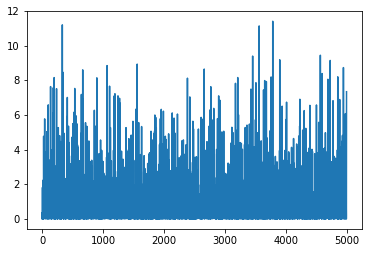

In [43]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(chis)
plt.show()

In [38]:
print(all_chis)

[[64.51251473382581, 167.63170511780066, 157.6098444480898, 180.8408545631586, 179.5269589686893, 168.447612513168, 188.37671378817018, 164.70712702167788, 158.38777548863803, 155.427469276541, 163.86694194084592, 159.93998115501404, 167.63456839235573, 157.76395514338452, 158.98795009880712, 157.07557663735724, 176.41714665306344, 138.98002425754015, 133.18334048514572, 154.85217148783644, 173.81640353598334, 158.47369475068152, 173.8721025494234, 169.55912359302914, 146.63561690065592, 159.05117950077152, 155.39917583156742, 176.1075299827983, 183.23453012009992, 158.3517196821827, 151.76107698063328, 160.56953089032518, 142.75562111948287, 167.1080008508896, 171.26169303685037, 148.49362702013804, 152.95517362145762, 170.4724903995975, 180.79673055897499, 156.93537483645318, 145.3523514965072, 161.4158867060769, 177.14624877393624, 145.6684372027182, 184.30812448321552, 171.7256512003467, 156.40132582302832, 171.47290955755966, 149.48777262603636, 174.67910617919512, 151.65582376426

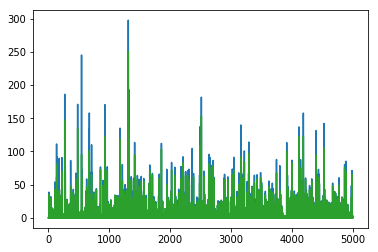

In [113]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(chis)
plt.plot(sigmas)
plt.plot(Fs)
plt.show()

# 3. $L=8, g=0.1, \alpha = 1.5$

In [ ]:
N = 5000
alpha = -1.5
L = 8

all_sigmas = []
all_chis = []
all_Fs = []

for g in [0.1]: #[0., 0.1]:
    for d in [2, 3]: #[2, 3, 4]:
        print("d: ", d)
        print("g: ", g)
        
        sigmas = []
        sigma = 0
        
        chis = []
        chi = 0
        
        Fs = []
        F = 0
        
        kappa = 1 / ( 2 * d + alpha)

        lattice_signs = np.ones(L**d, dtype=int)
        lattice_rad = np.random.uniform(size=L**d)

        for i in range(N):
            x, sites = spin_update()
            
            chi_i = compute_chi(x, sites)
            chi += chi_i / N
            chis.append(chi_i)
            
            F_i = compute_F(x, sites)
            F += F_i / N
            Fs.append(F_i)
            
            update_spin_at_sites(sites)
            regular_update(g)

            sigma_i = compute_sigma()
            sigma += sigma_i / N
            sigmas.append(sigma_i)
        
        M_L = 2 * (np.sin(np.pi / L)) / (np.sqrt((chi / F) - 1))
        
        print("Sigma: ", sigma)
        print("Chi: ", chi)
        print("F ", F)
        print("M(L): ", M_L)
        
        all_sigmas.append(sigmas)
        all_chis.append(chis)
        all_Fs.append(Fs)